# Reproduce Figure 2 from MAML paper


In [1]:
import matplotlib.pyplot as plt
from scipy import signal
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

from ge_maml import *

In [2]:
from ge_maml import *

log = defaultdict(list)
model = Model(input_n=1, output_n=1, optimizer='SGD')
M.start(silent=False)
maml_supervised(model, Problem, n_epochs=70000, task_batch_n=10, k_shot=10, n_gradient_steps=1, 
                final_figure=None, logger=log)
M.split()

Timer Started


A Jupyter Widget

Lap Time: 2057.0376s


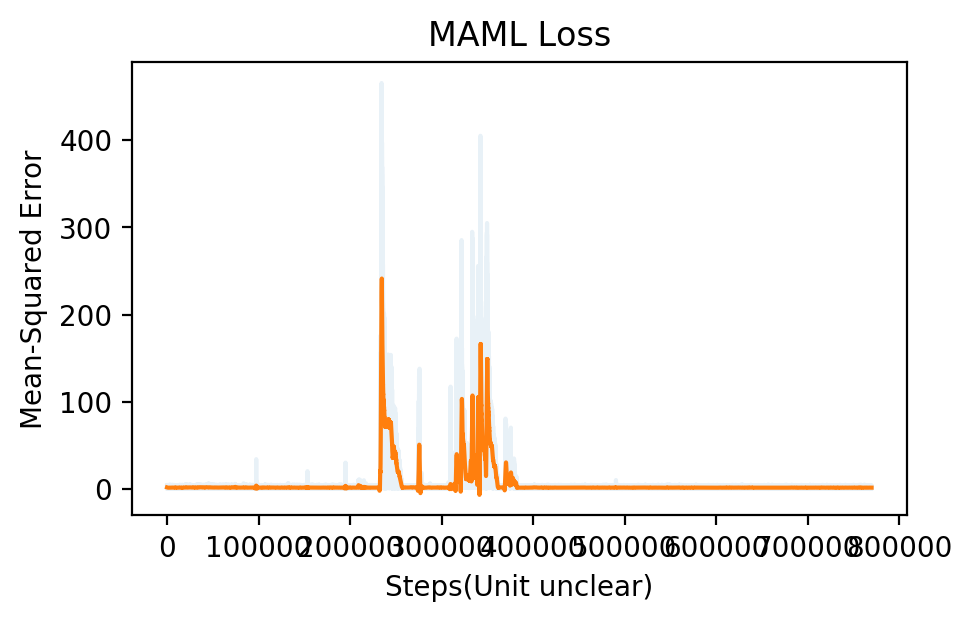

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

loss = log['loss']
smoothed = signal.savgol_filter(loss, 2001, 2)

fig = plt.figure(figsize=(5, 3), dpi=100)
plt.plot(loss, alpha=0.1, label='raw')
plt.plot(smoothed, label='smoothed')
plt.title('MAML Loss')
plt.xlabel('Steps(Unit unclear)')
plt.ylabel('Mean-Squared Error');

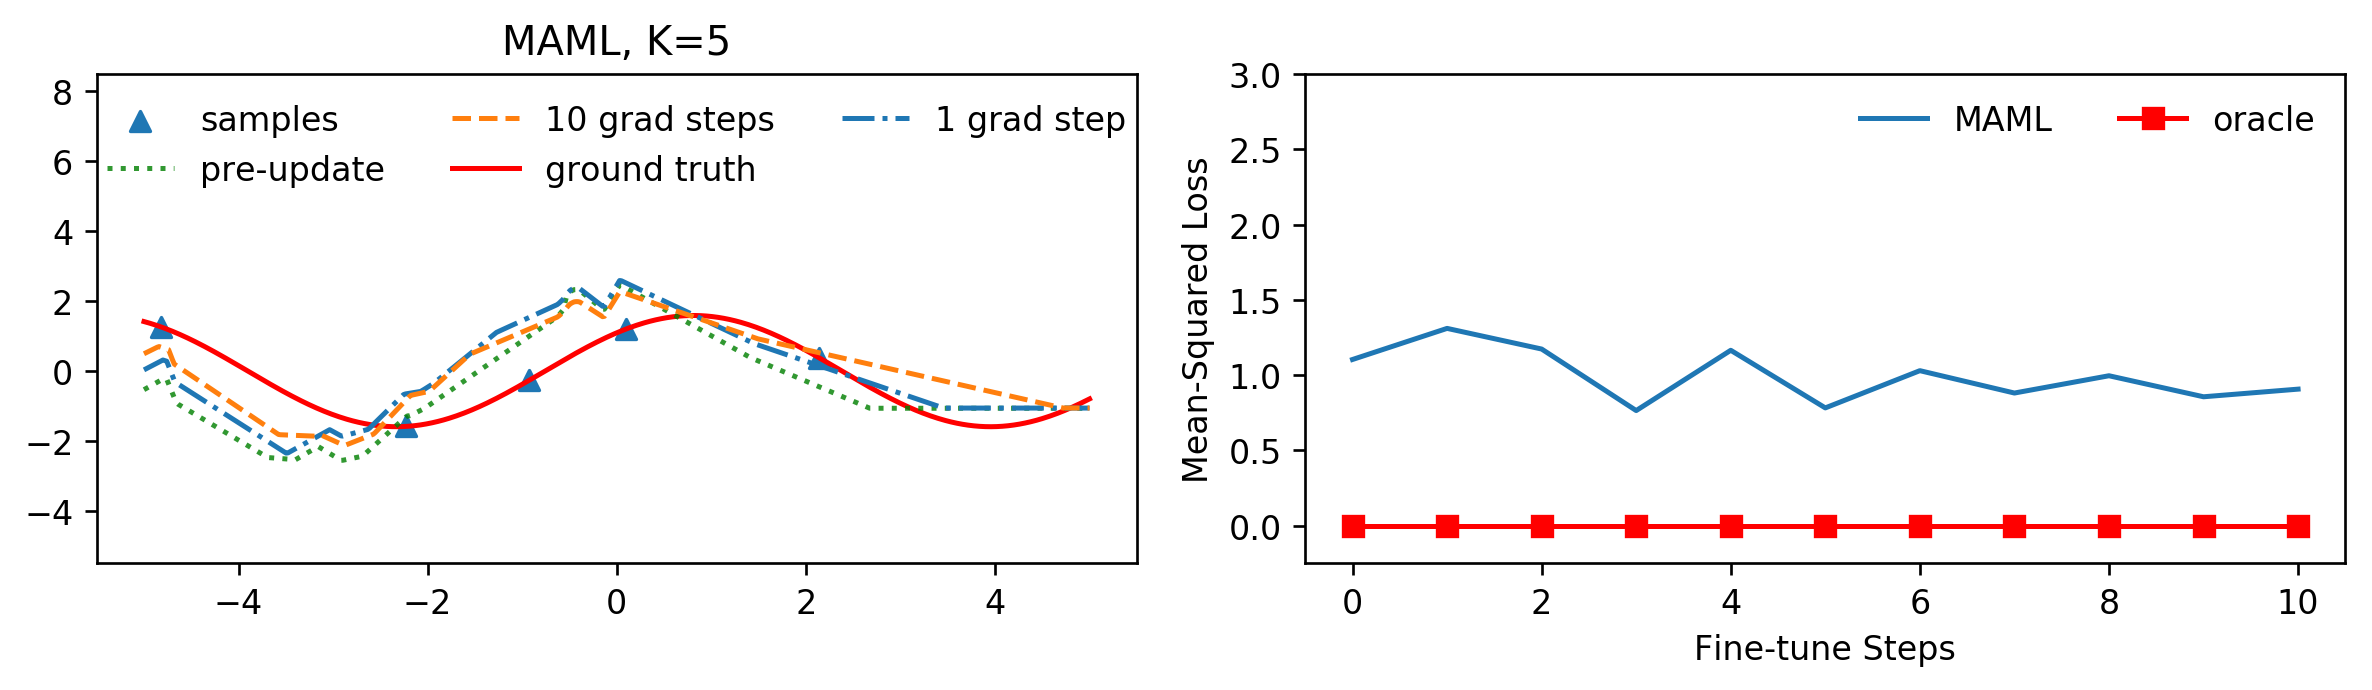

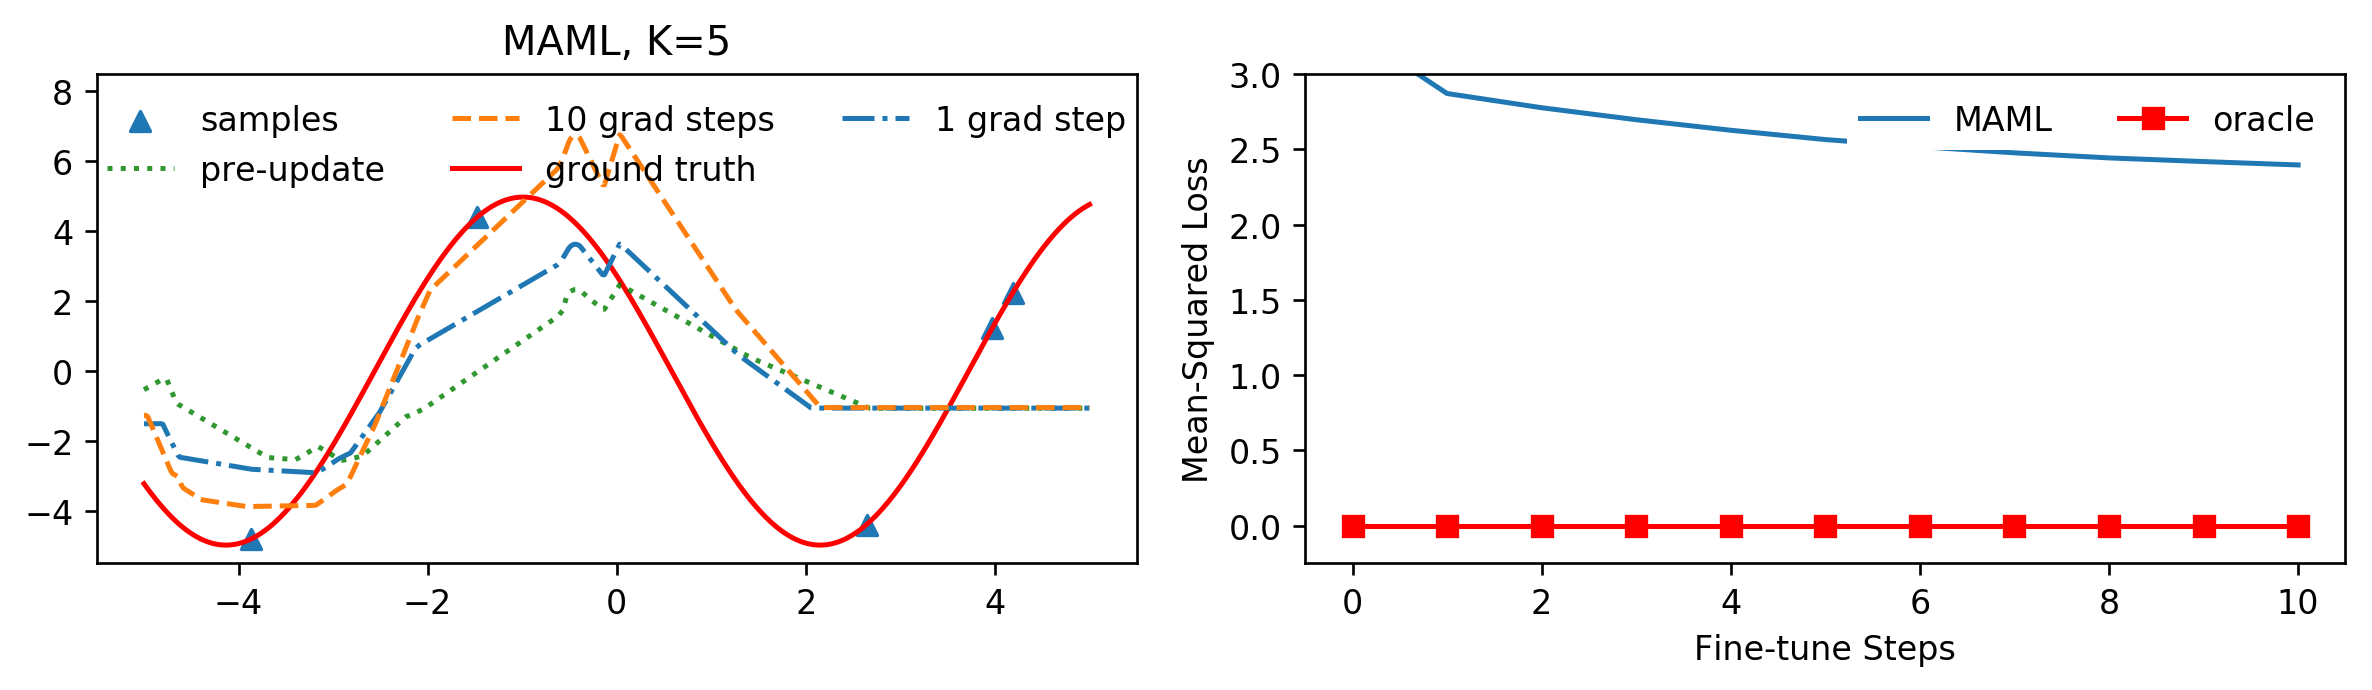

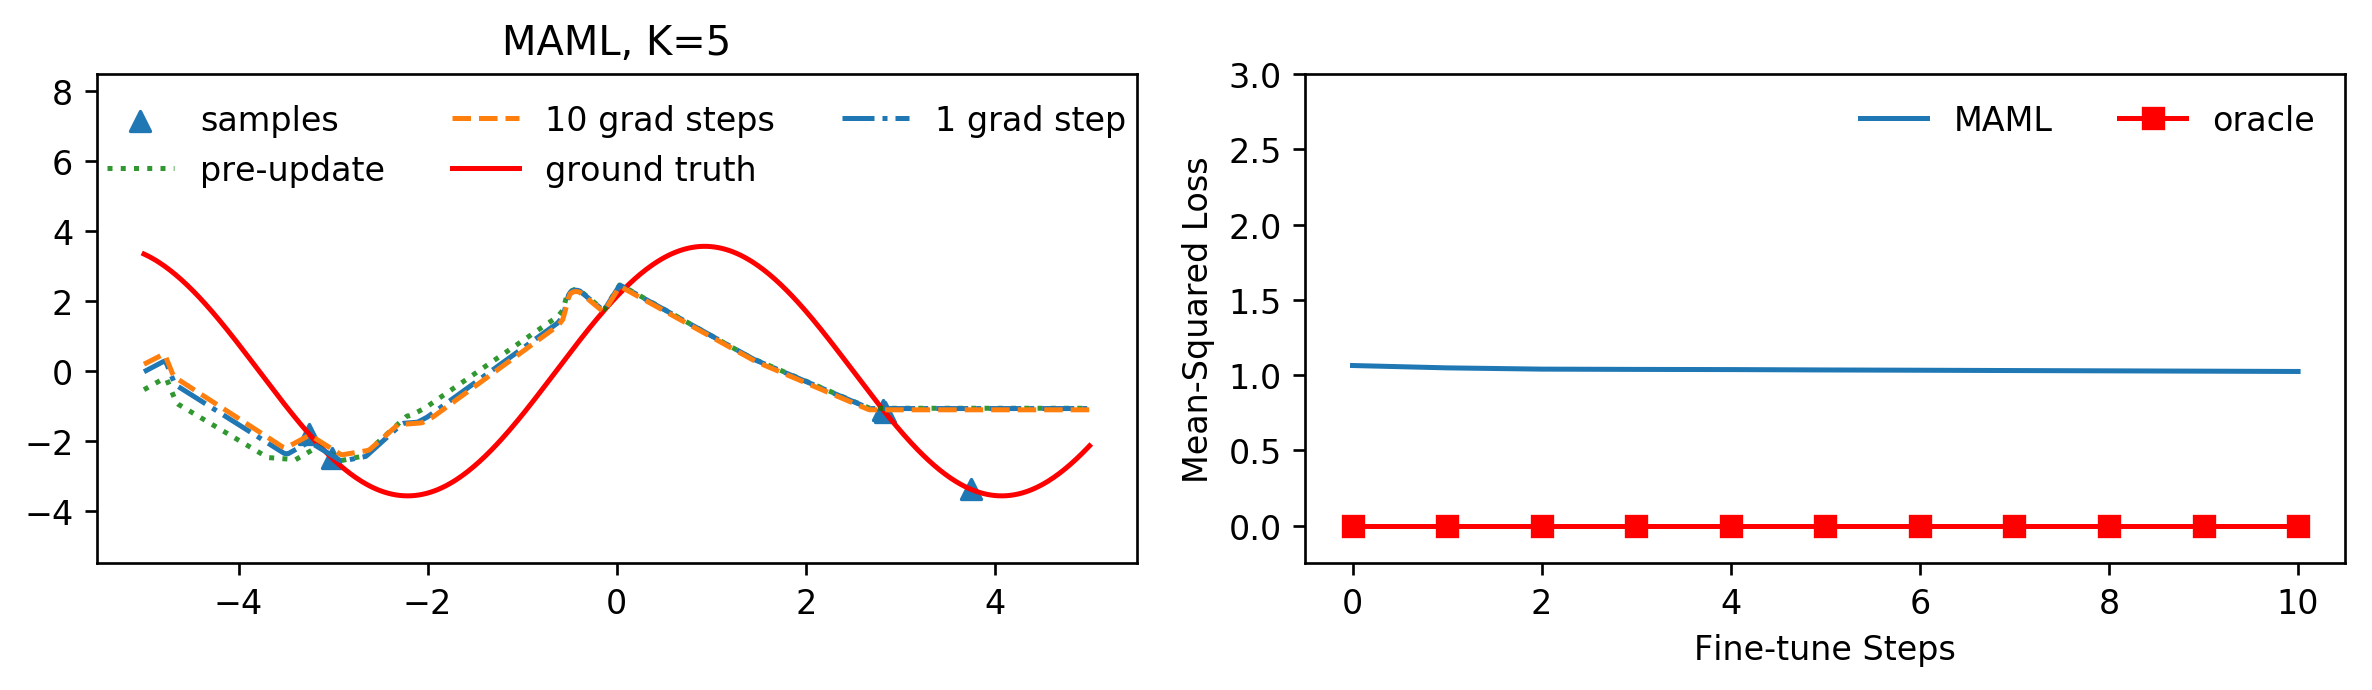

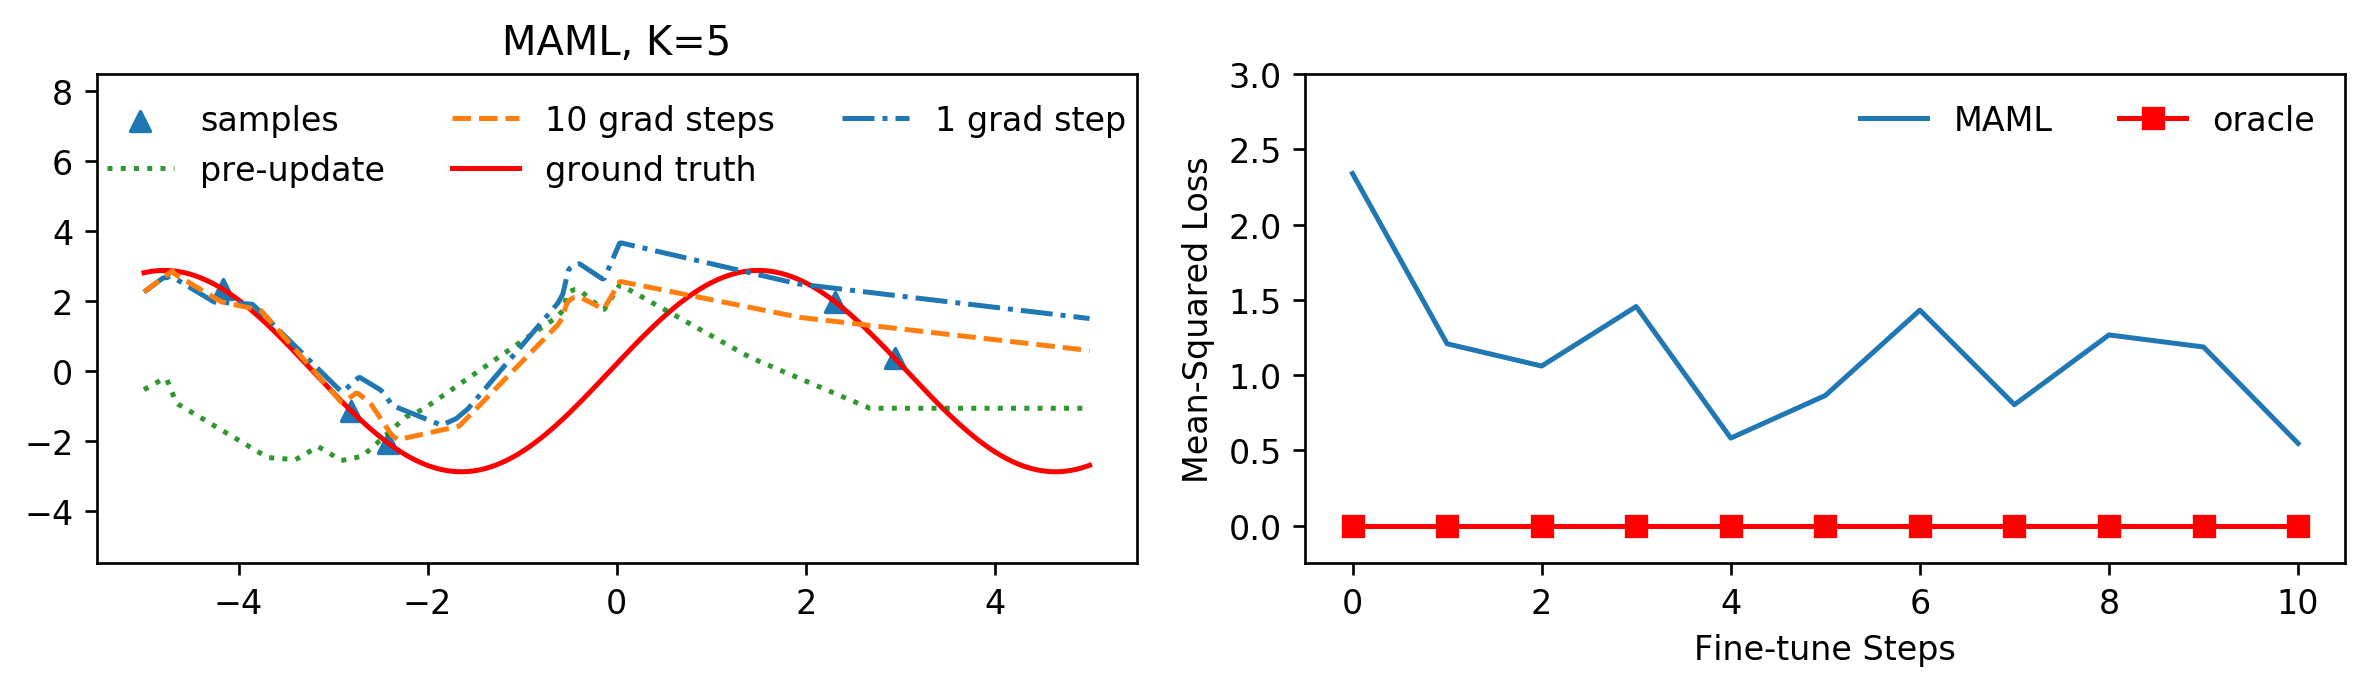

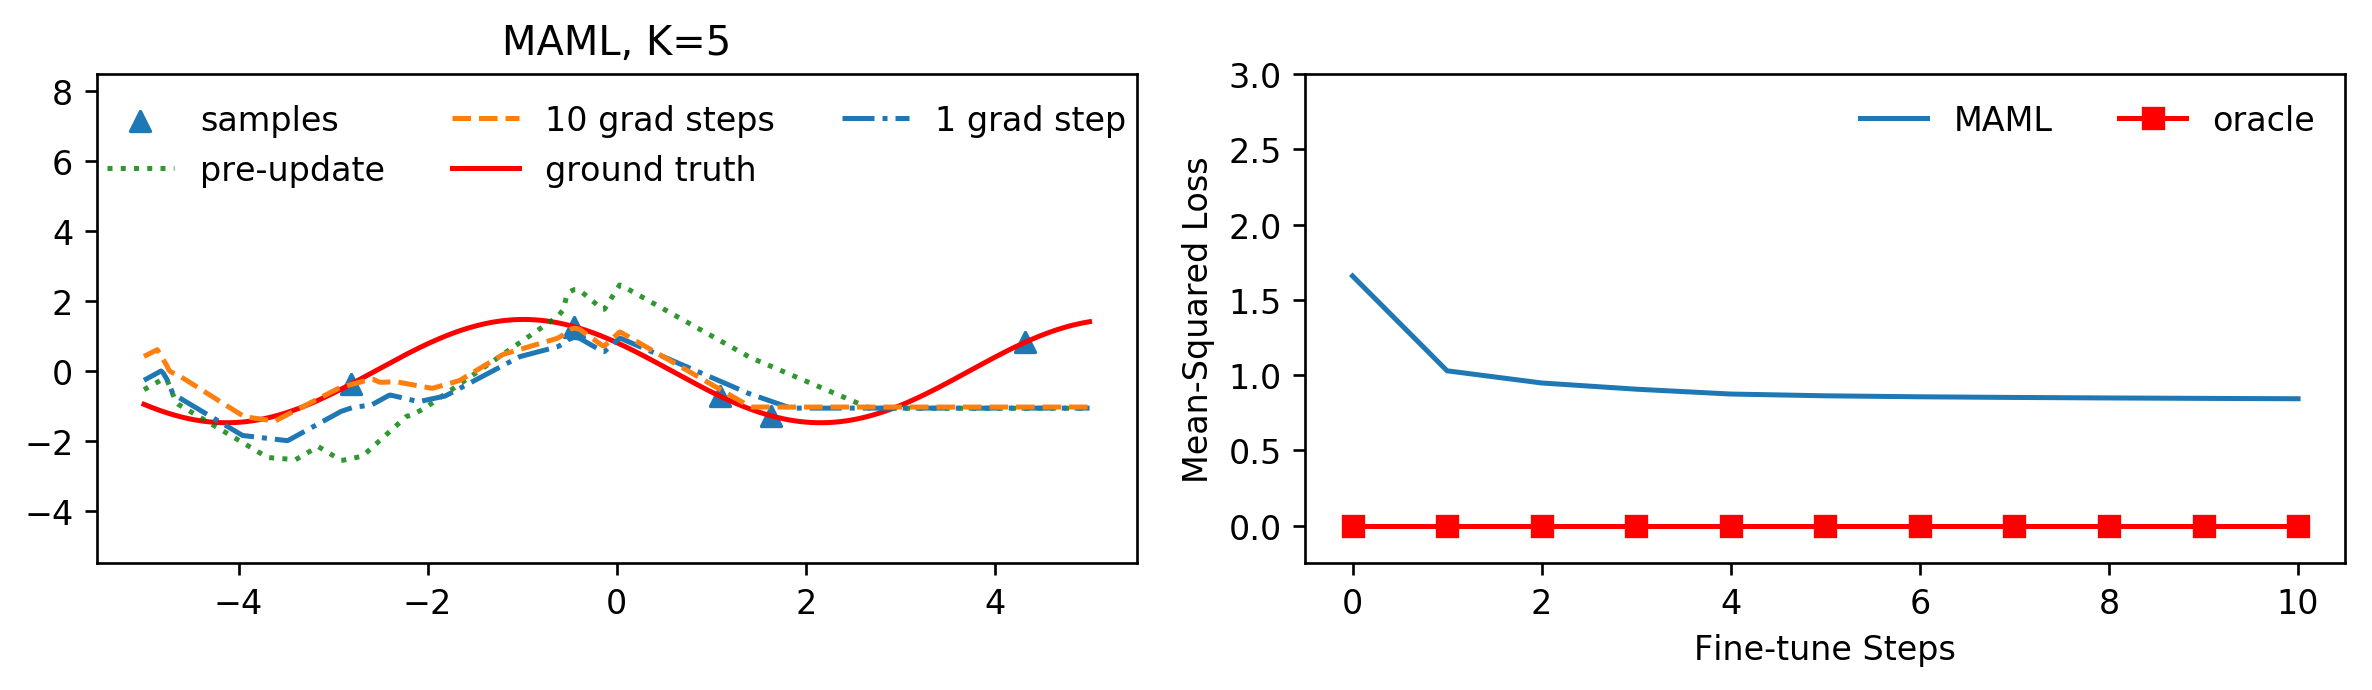

In [4]:
from ge_maml import *
from paper_metrics import *

for i in range(5):
    fig = plt.figure(figsize=(10, 3), dpi=120)
    fine_tune_plot(fig, "MAML, K={k}", Problem(), model, k=5, n_steps=10)

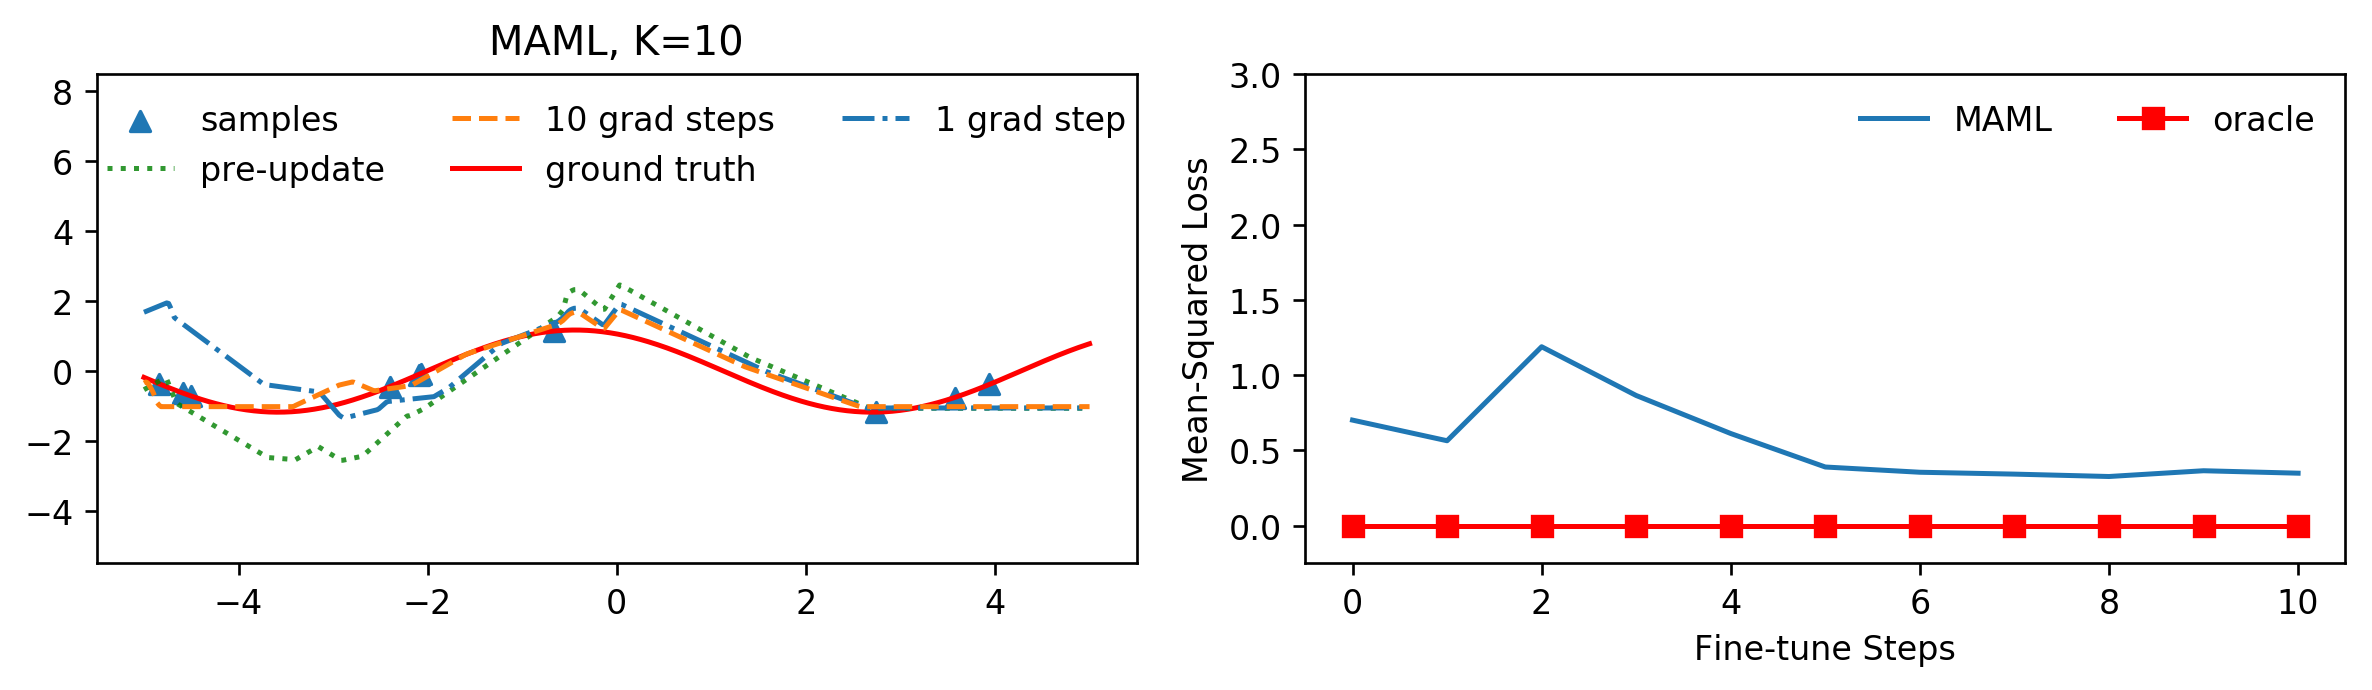

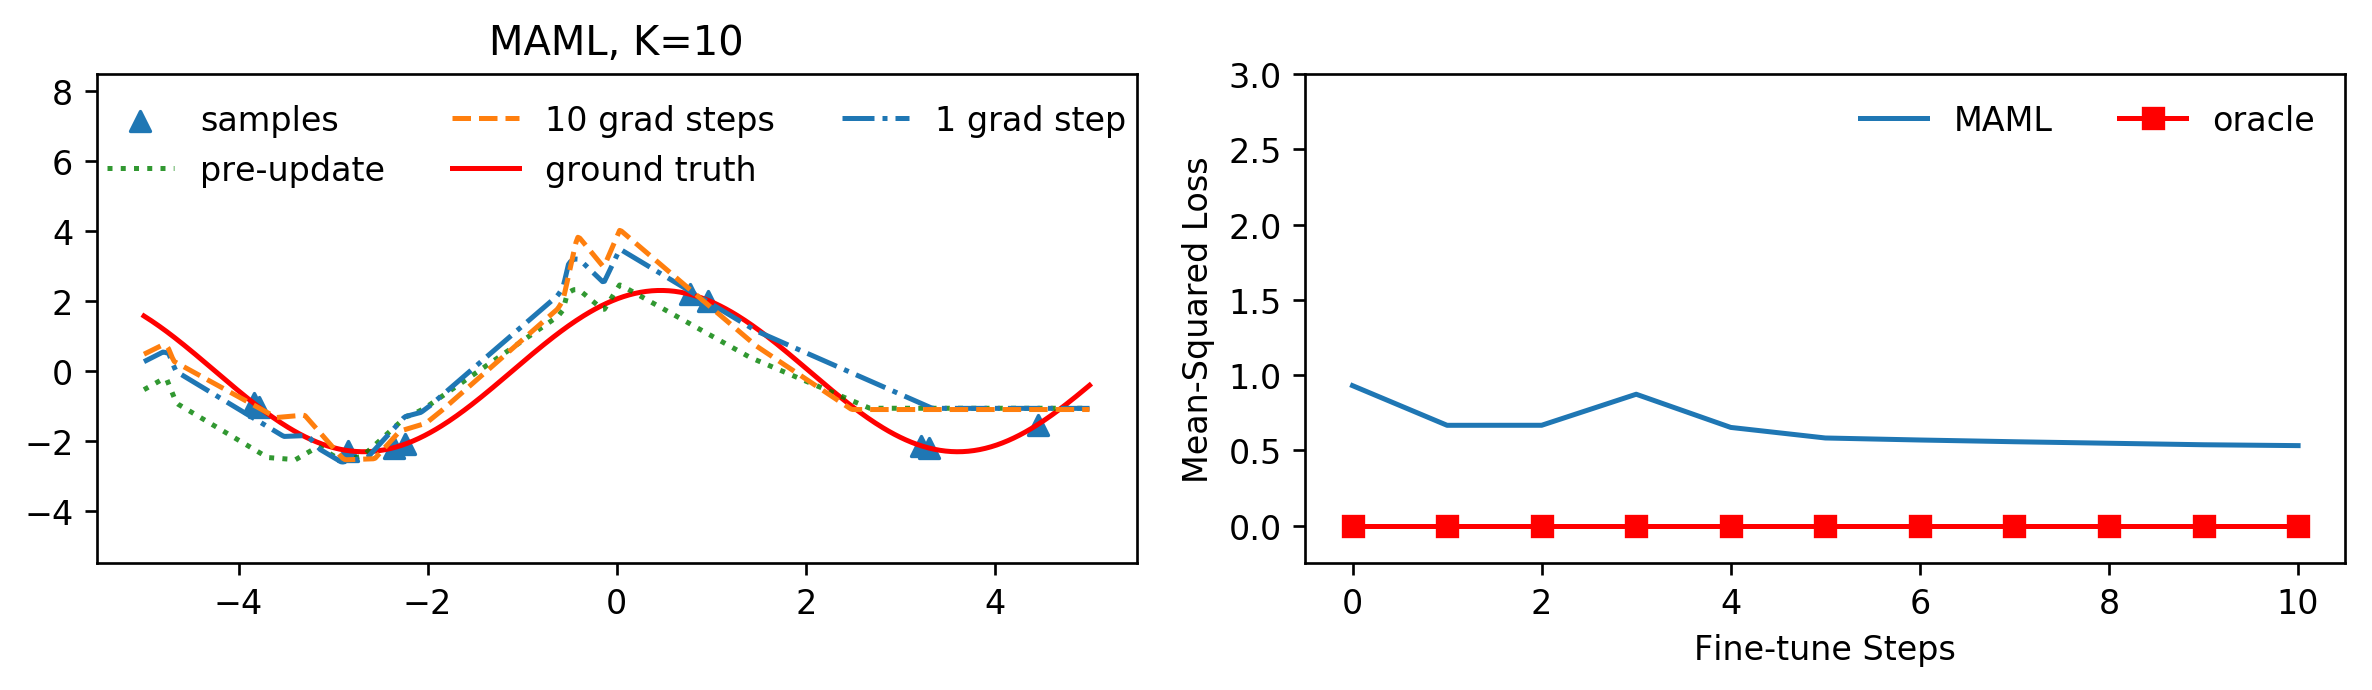

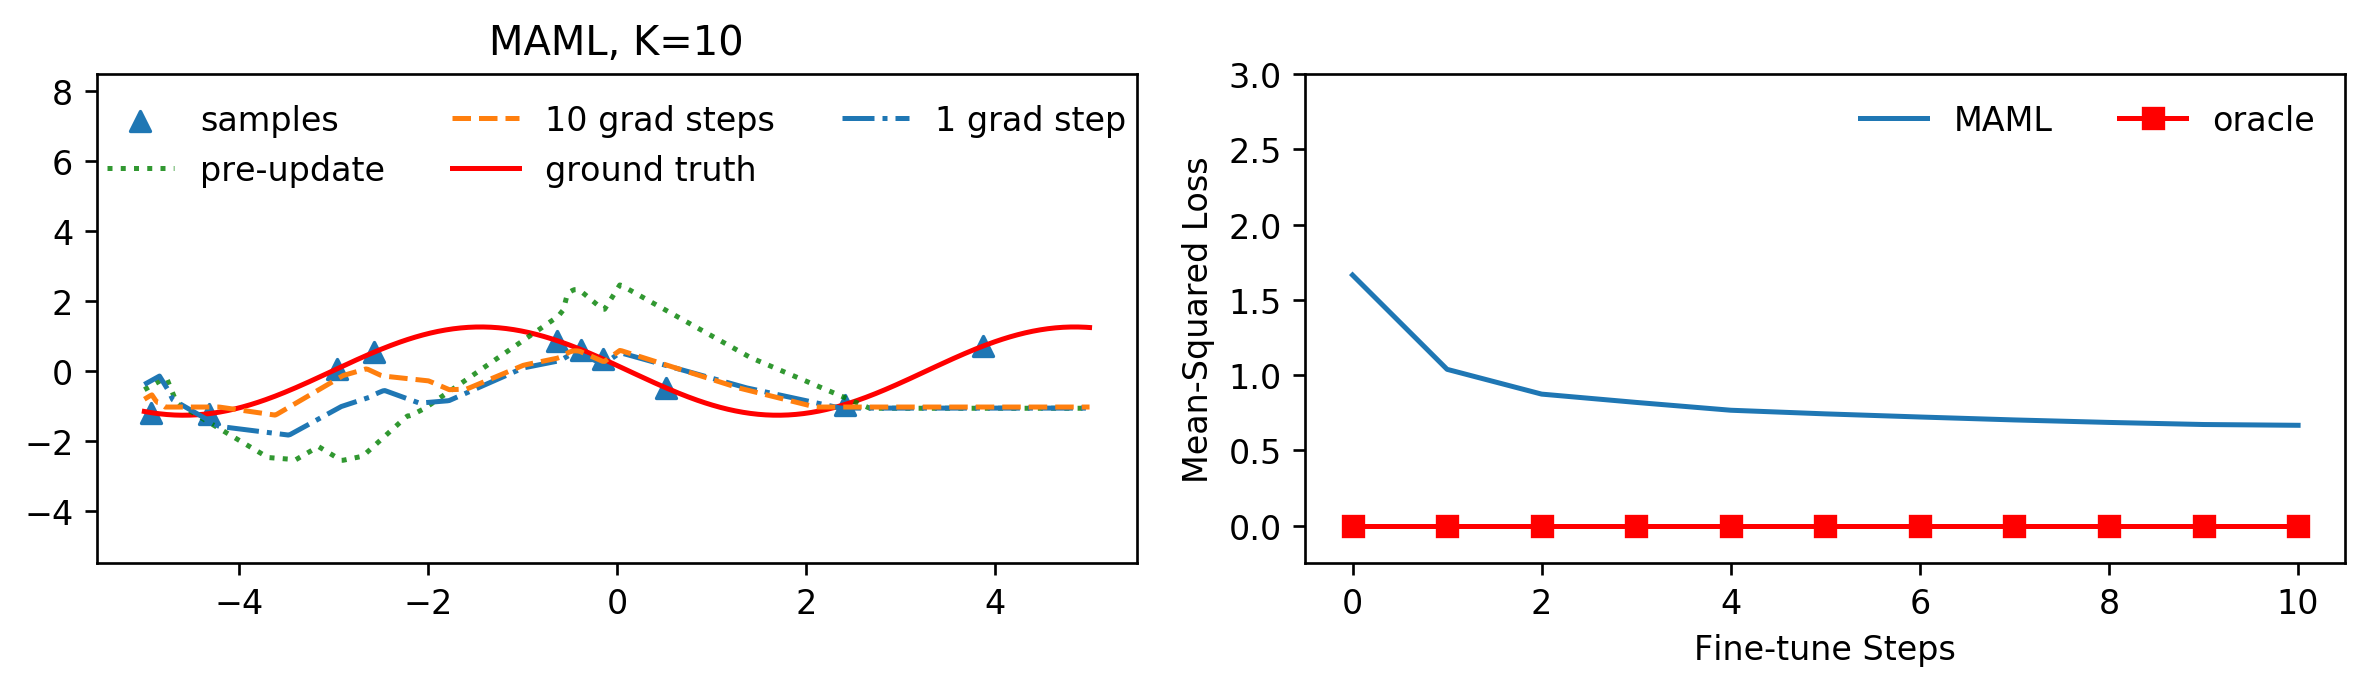

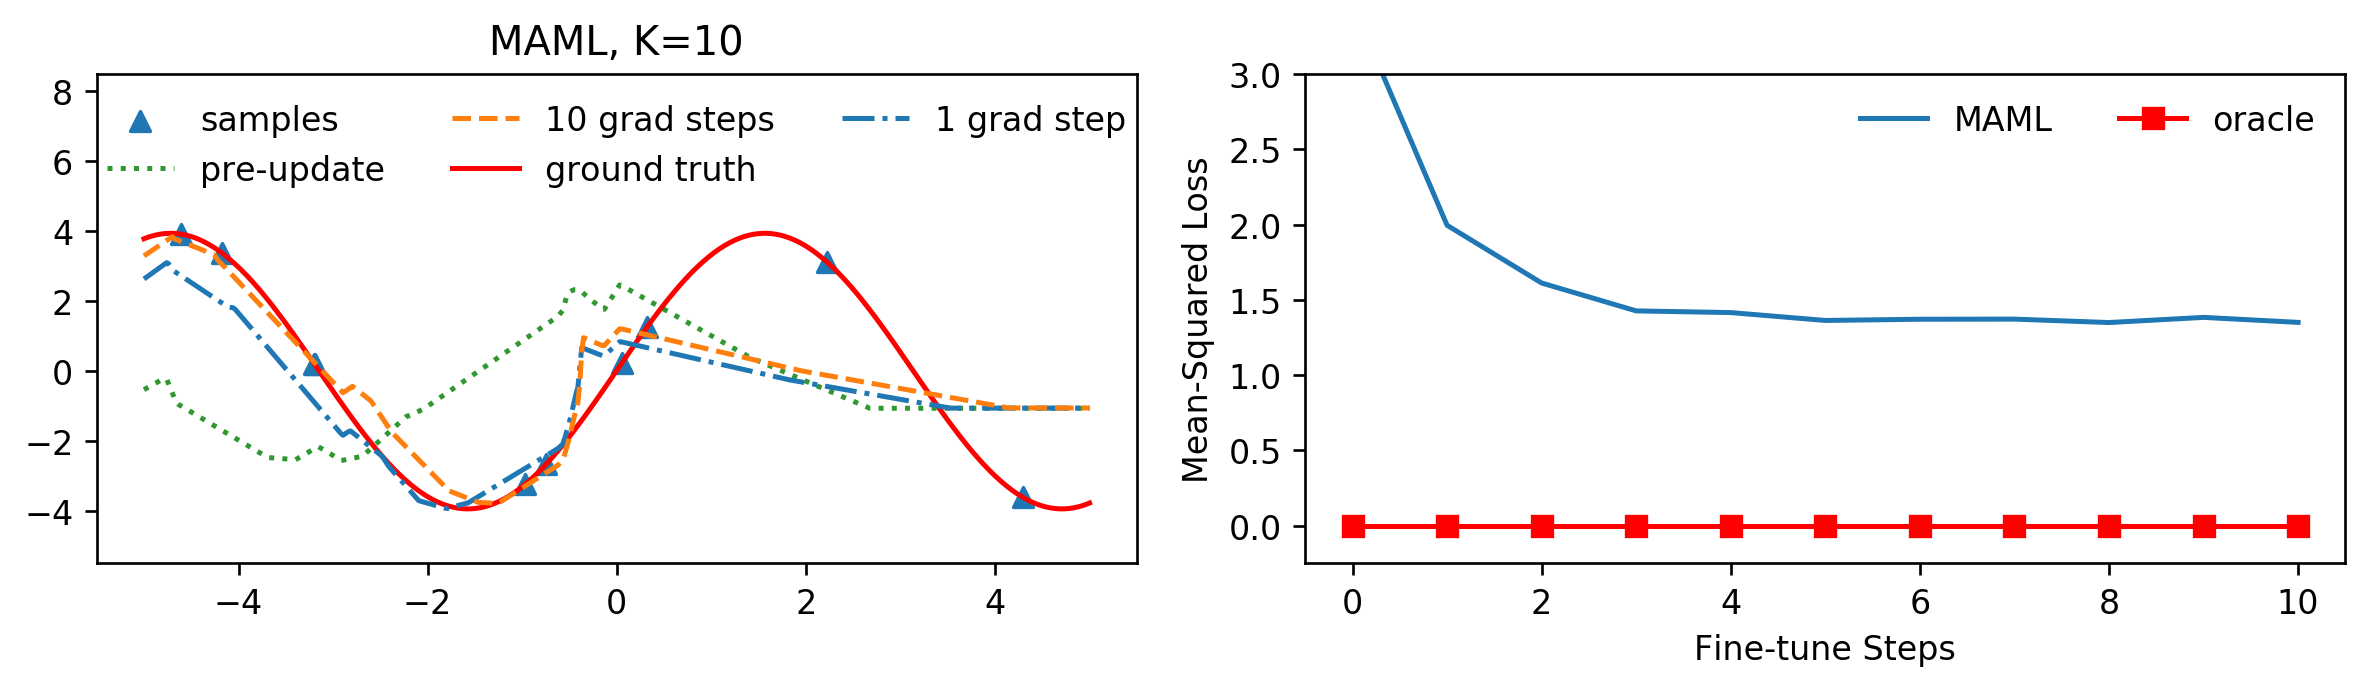

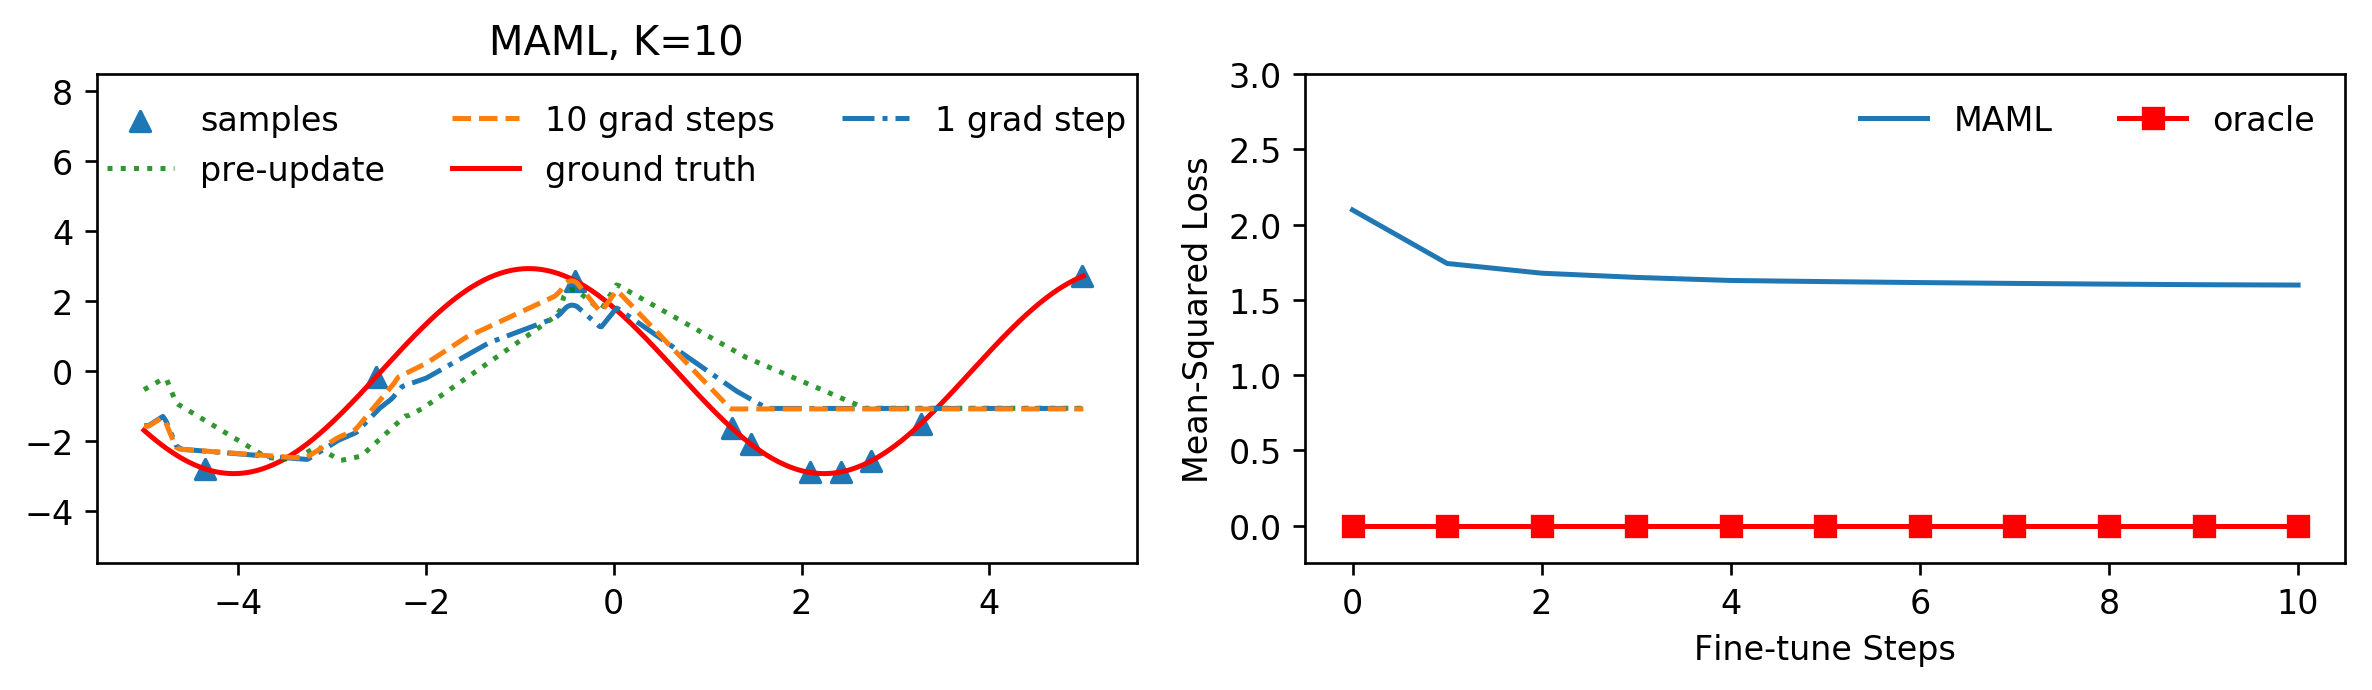

In [5]:
from ge_maml import *
from paper_metrics import *

for i in range(5):
    fig = plt.figure(figsize=(10, 3), dpi=120)
    fine_tune_plot(fig, "MAML, K={k}", Problem(), model, k=10, n_steps=10)

In [6]:
from ge_maml import *
from paper_metrics import *

log = fine_tuning_statistics(Problem, model, runs=500, k=10, n_steps=10)

A Jupyter Widget

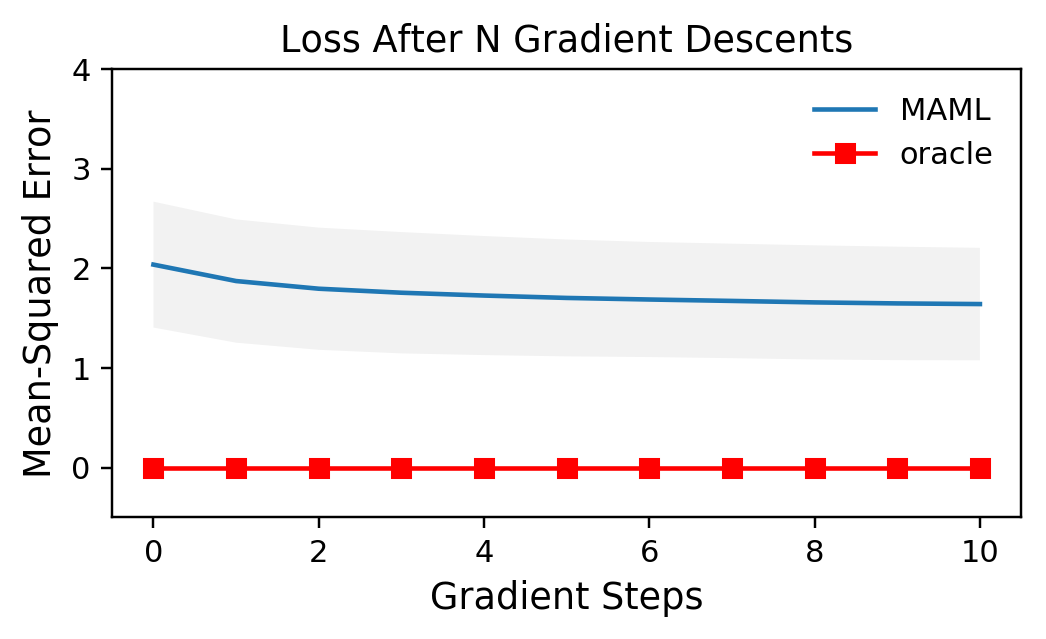

In [7]:
losses = np.array(log['loss'])
lavg = losses.mean(axis=0).squeeze(axis=1)
lstd = losses.var(axis=0).squeeze(axis=1)
l = losses.shape[1]


fig = plt.figure(figsize=(5, 3), dpi=110)

plt.plot(losses.mean(axis=0), label="MAML")
plt.fill_between(range(l), lavg - lstd, lavg + lstd, facecolor='black', alpha=0.05)
plt.plot([0] * l, 's-', label="oracle", color="red")
plt.title('Loss After N Gradient Descents')
plt.xlabel('Gradient Steps', fontsize=12)
plt.ylabel('Mean-Squared Error', fontsize=12)
plt.legend(framealpha=1, edgecolor='none')
plt.tight_layout()
plt.ylim(-0.5, 4);